# 引入必要的模块

In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
from gensim.models.word2vec import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

2019-06-26 14:54:36,013 : INFO : 'pattern' package found; tag filters are available for English


# 加载已经训练好的模型

In [3]:
def load_model(model_path):
    if model_path.endswith('.bin') or model_path.endswith('.txt'):
        binary = True if model_path.endswith('.bin') else False
        model = KeyedVectors.load_word2vec_format(model_path,binary=binary, unicode_errors='ignore')
    else:
        model = Word2Vec.load(model_path)
        model = model.wv
    return model

- 只需要在这里填写模型地址
- <b>注意</b> 模型地址要用反斜杠“/”分割路径

In [4]:
model = load_model("bnc_lower.bin")

2019-06-26 14:54:36,076 : INFO : loading projection weights from bnc_lower.bin
2019-06-26 14:54:36,076 : WARNING : this function is deprecated, use smart_open.open instead
2019-06-26 14:54:39,232 : INFO : loaded (161579, 100) matrix from bnc_lower.bin


# 词向量查询

- 相似词检索

In [16]:
model.most_similar('Apple',topn=10)

KeyError: "word 'Apple' not in vocabulary"

In [15]:
model.most_similar('good',topn=10)

[('bad', 0.7714970111846924),
 ('nice', 0.698111891746521),
 ('marvellous', 0.6592308878898621),
 ('decent', 0.6368151307106018),
 ('fair', 0.6354837417602539),
 ('wonderful', 0.63509202003479),
 ('lousy', 0.6312680244445801),
 ('perfect', 0.6263607740402222),
 ('fine', 0.6167620420455933),
 ('clever', 0.6117841005325317)]

- 相似度计算

In [7]:
model.similarity('apple','banana')

0.5903186

- 类比推理

In [8]:
model.most_similar(positive=['king','woman'], negative=['man'],topn=10)

[('queen', 0.8614708185195923),
 ('prince', 0.7710027694702148),
 ('emperor', 0.7509008646011353),
 ('empress', 0.7503201961517334),
 ('pope', 0.749457836151123),
 ('duke', 0.7162444591522217),
 ('princess', 0.7060992121696472),
 ('throne', 0.7047961354255676),
 ('countess', 0.6967053413391113),
 ('lij', 0.6810743808746338)]

In [9]:
model.most_similar(positive=['beijing','japan'], negative=['china'],topn=10)

[('tokyo', 0.7525430917739868),
 ('washington', 0.6978838443756104),
 ('stockholm', 0.6947522163391113),
 ('budapest', 0.6755738258361816),
 ('frankfurt', 0.6744974851608276),
 ('ottawa', 0.6646943688392639),
 ('moscow', 0.6634535789489746),
 ('tehran', 0.6627970933914185),
 ('seoul', 0.6627578139305115),
 ('madrid', 0.6606320142745972)]

# 可视化呈现

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [11]:
def plot_with_labels(low_dim_embs, labels):        
    plt.figure(figsize=(60, 48))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i]
        plt.scatter(x, y,c='r')
        fontsize = 50            
        bbox_props = dict(boxstyle="round,pad=0.3", fc="y", ec="0.5", lw=2,alpha=0.4)
        plt.annotate(label,  xy=(x, y),xytext=(5, 2), textcoords='offset points',fontsize=fontsize,
             ha='right', va='bottom',bbox=bbox_props)

def words2vectors(model,words):
    y = []
    X = []
    for w in words:
        if w not in model:
            print(w, ' is not in model, SKIPPED!')
            continue
        y.append(w)
        X.append(model[w])
    return X,y

def reduce_dim(X):
    tsne_x = TSNE(perplexity=50, n_components=2, learning_rate=50,
#                   init='pca',                    
                  n_iter=5000).fit_transform(np.array(X))
    return tsne_x

def reduce_dim2(X):
    pca = PCA(n_components=2).fit_transform(X)
    return pca

In [12]:
def visualize_words(model,words):
    X,y = words2vectors(model,words)
    X = reduce_dim(X)
    plot_with_labels(X,y)

- ** 输入要可视化的单词 **
- 以空格分开
- 小写(根据模型训练时的情况)

In [13]:
words = 'tianjing shanghai shenzhen guangzhou beijing tokyo london rome paris washington'

tianjing  is not in model, SKIPPED!


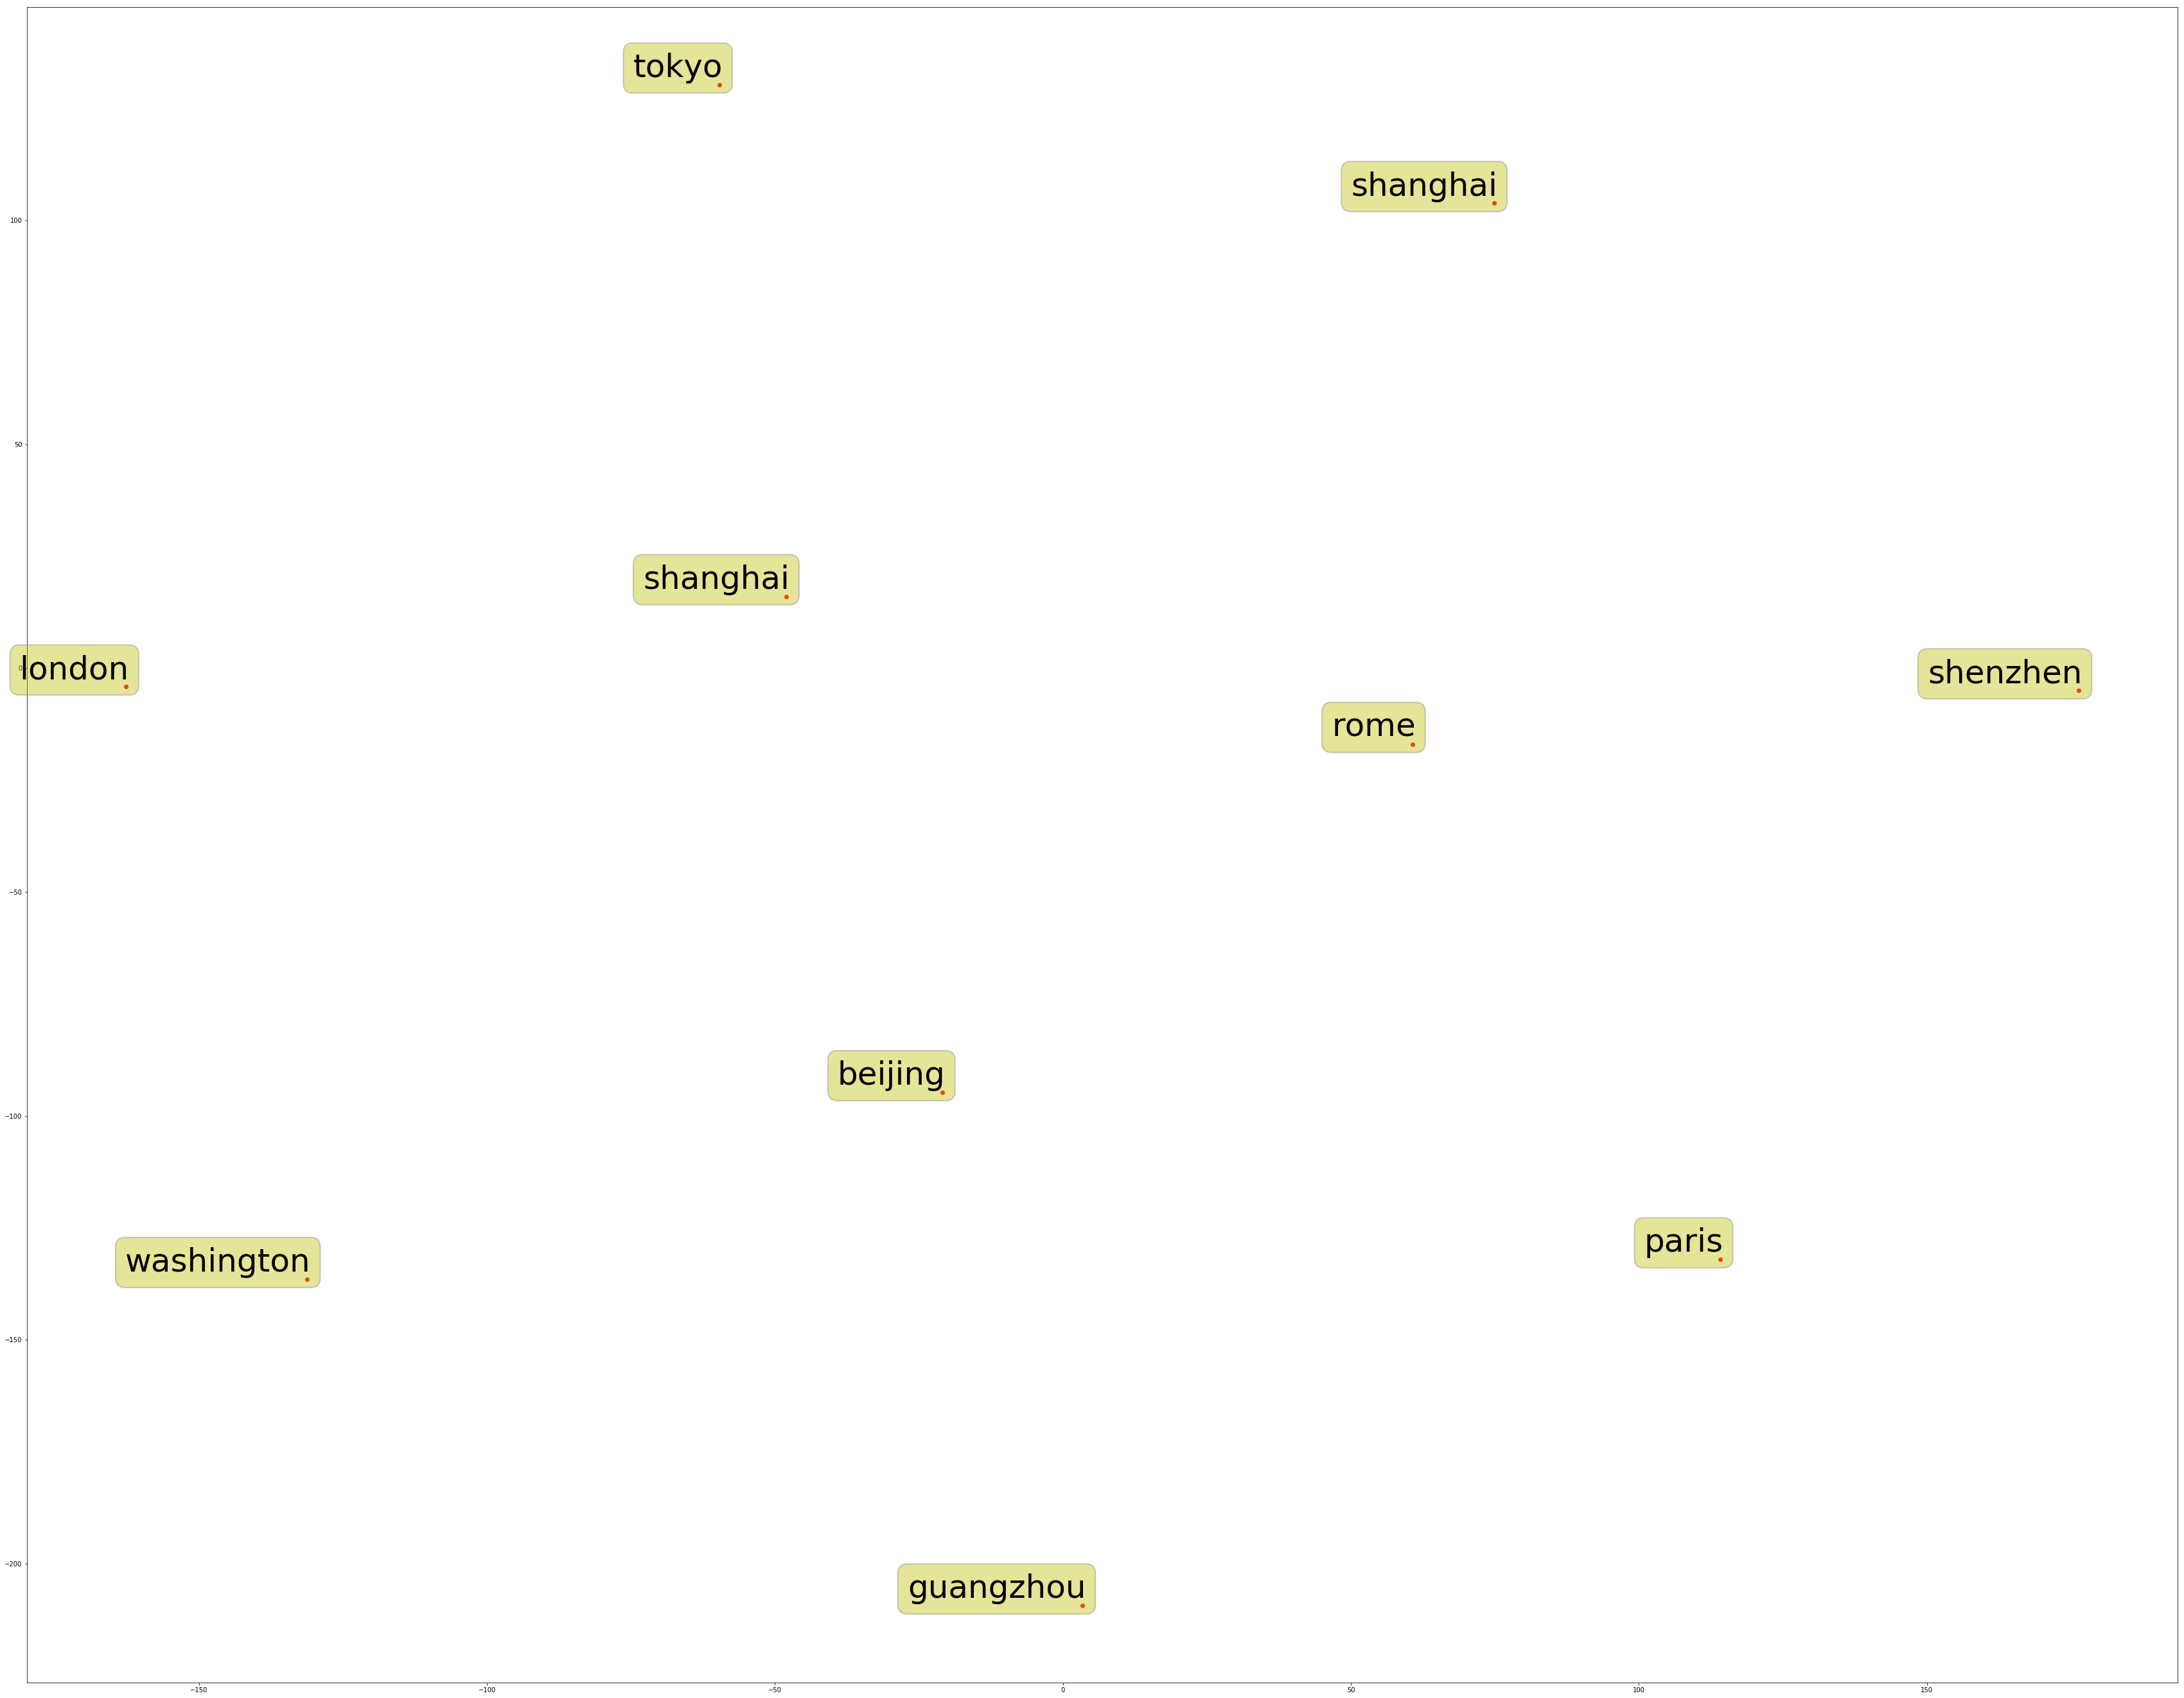

In [14]:
visualize_words(model,words.split())

# 现成工具

- 词向量查询
- sketch engine https://embeddings.sketchengine.co.uk/

- 词向量可视化

- http://projector.tensorflow.org/
- https://helboukkouri.github.io/embedding-visualization/
- 等等